In [25]:
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot
from evaluation.evaluation_func import read_results

In [26]:
# def create_separate_df(mode = "balanced"):
#     base_path = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"
 
#     central = pd.read_csv(base_path + mode + "/results/central_res.tsv", sep="\t", index_col=0).dropna()
#     FedProt = pd.read_csv(base_path + mode + "/results/DPE.csv", sep="\t", index_col=0).dropna()

#     Fisher = pd.read_csv(base_path + mode + "/results/MA_CM.tsv", sep="\t", index_col=1).dropna()
#     Stouffer = pd.read_csv(base_path + mode + "/results/MA_Stouffer.tsv", sep="\t", index_col=0)
#     RankProduct = pd.read_csv(base_path + mode + "/results/MA_RankProd.tsv", sep="\t", index_col=0).dropna()
#     REM_res = pd.read_csv(base_path + mode + "/results/MA_REM.tsv", sep="\t", index_col=1).dropna()

#     filter_list_META = {
#         "Central" : pd.DataFrame(central.index.tolist(), columns=['proteins']),
#         "FedProt" : pd.DataFrame(FedProt.index, columns=['proteins']),
#         "Fisher" : pd.DataFrame(Fisher.index, columns=['proteins']),
#         "Stouffer" : pd.DataFrame(Stouffer.index, columns=['proteins']),
#         "RankProd" : pd.DataFrame(RankProduct.index, columns=['proteins']),
#         "REM" : pd.DataFrame(REM_res.index, columns=['proteins'])
#     }

#     return filter_list_META


In [27]:
def create_separate_df(mode = "balanced"):
    base_path = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"
    df = read_results(
        base_path + mode + "/results/",
        deqms_name = "central_res.tsv",
        drop_na = False
    )

    filter_list_META = {
        # toke all columns with DEqMS in colname
        "Central" : pd.DataFrame(df[df.columns[df.columns.str.contains("DEqMS")]].dropna().index.tolist(), columns=['proteins']),
        "FedProt" : pd.DataFrame(df[df.columns[df.columns.str.contains("FedProt")]].dropna().index, columns=['proteins']),
        "Fisher" : pd.DataFrame(df[df.columns[df.columns.str.contains("Fisher")]].dropna().index, columns=['proteins']),
        "Stouffer" : pd.DataFrame(df[df.columns[df.columns.str.contains("Stouffer")]].dropna().index, columns=['proteins']),
        "RankProd" : pd.DataFrame(df[df.columns[df.columns.str.contains("RankProd")]].dropna().index, columns=['proteins']),
        "REM" : pd.DataFrame(df[df.columns[df.columns.str.contains("REM")]].dropna().index, columns=['proteins'])
    }

    return filter_list_META

# Meta analyses

In [28]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/analysed_proteins.json', 'r') as file:
    filter_list_META = json.load(file)

# transform list into pandas df column
for key in filter_list_META.keys():
    for center in filter_list_META[key].keys():
        # use proteins as a colname of a dataframe
        filter_list_META[key][center] = pd.DataFrame(filter_list_META[key][center], columns=['proteins'])

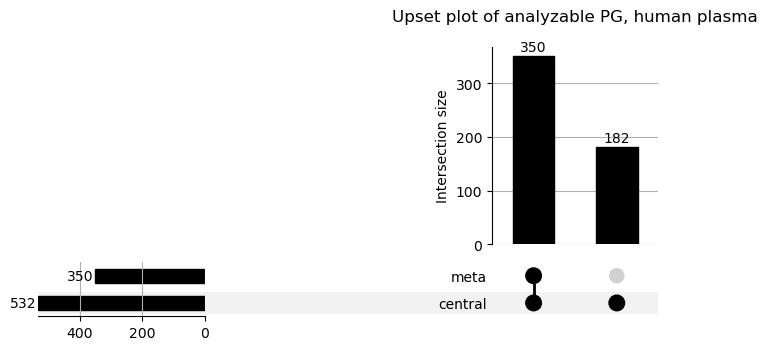

In [29]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_balanced_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_balanced_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/upset_plot_balanced.svg',
)


Results loaded for DEqMS with 532 proteins.
Results loaded for FedProt with 532 proteins.
Results loaded for Fisher with 432 proteins.
Results loaded for REM with 591 proteins.
Results loaded for Stouffer with 350 proteins.
Results loaded for RankProd with 591 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_balanced_PG_MajorPG/results/ with 591 genes. Adj.p-values were not log-transformed.


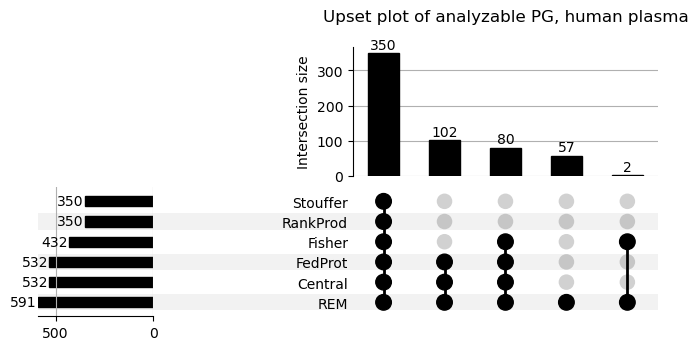

In [30]:
results = create_separate_df("01_smaller_lib_balanced_PG_MajorPG")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/upset_plot_balanced_v2.svg',
)


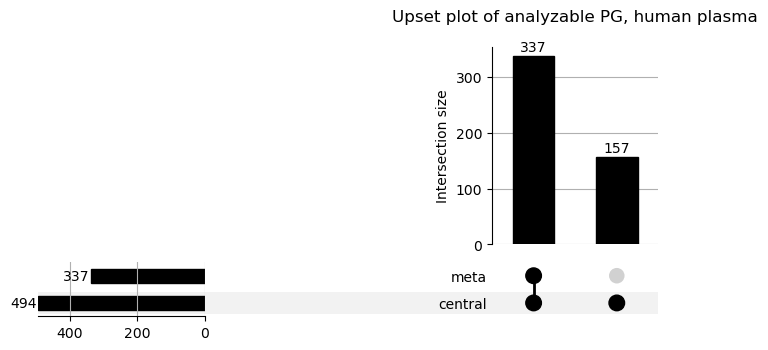

In [8]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_imbalanced_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_imbalanced_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_imbalanced.svg',
)


Results loaded for DEqMS with 494 proteins.
Results loaded for FedProt with 494 proteins.
Results loaded for Fisher with 419 proteins.
Results loaded for REM with 570 proteins.
Results loaded for Stouffer with 443 proteins.
Results loaded for RankProd with 443 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_imbalanced_PG_MajorPG/results/ with 570 genes. Adj.p-values were not log-transformed.


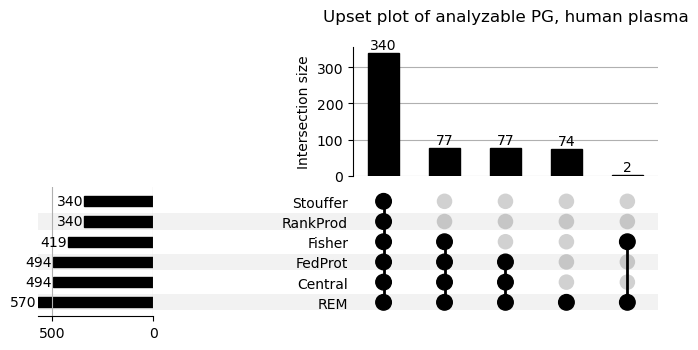

In [9]:
results = create_separate_df("01_smaller_lib_imbalanced_PG_MajorPG")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_imbalanced_v2.svg',
)


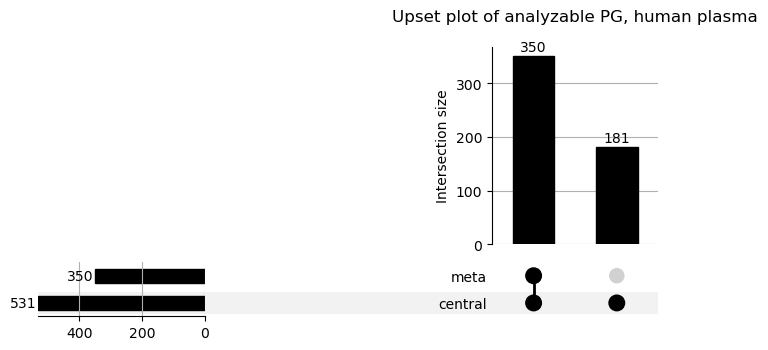

In [10]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_downsampled_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_downsampled_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_downsampled.svg',
)


# Inside centerts

In [11]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/analysed_proteins_LABS.json', 'r') as file:
    lists_labs = json.load(file)

# transform list into pandas df column
for key in lists_labs.keys():
    for center in lists_labs[key].keys():
        # use proteins as a colname of a dataframe
        lists_labs[key][center] = pd.DataFrame(lists_labs[key][center], columns=['proteins'])

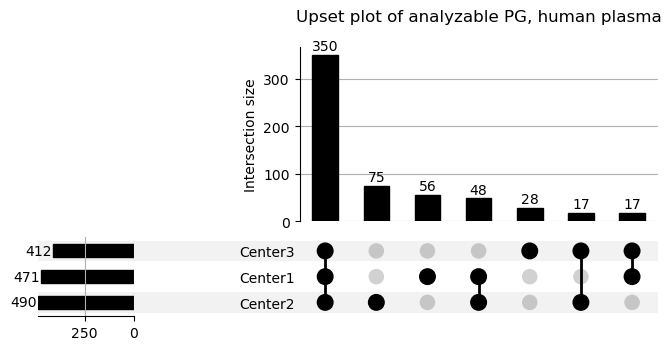

In [13]:
balanced_plot = upset_plot.generate_upset_plot(
    lists_labs['01_smaller_lib_balanced_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=lists_labs['01_smaller_lib_balanced_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/upset_plot_balanced_LABS.svg',
)
